# "Optimasi Pemilihan Produk Skincare Berdasarkan Karakteristik Kulit Menggunakan Algoritma Decision Tree."

## A. Business Understanding

###
Latar Belakang: Masyarakat seringkali bingung menentukan skincare yang tepat untuk wajah mereka berdasarkan karakteristik kulitnya.

Problem Statement: Penggunaan skincare yang tidak tepat, bukanya menyembuhkan kulit tetapi malah menyebabkan wajah iritasi, breakout dan kemerahan.

Tujuan: Analisis pemilihan produk skincare berdasarkan karakteristik kulit guna meminimalisir kerusakan pada kulit wajah.

## B. Data Uderstanding dan Cleaning

### B.1 Import Library

In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### B.2 Read Data Dan Lihat 5 Data Teratas

In [325]:
try:
 df = pd.read_csv("cosmetic_p.csv")
 print("Berhasil Membaca Data")
except Exception as e:
 print(f"Gagal Membaca Data As {e}")

Berhasil Membaca Data


In [326]:
df.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


### B.3 Lihat Informasi Data

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


### B.4 Cek Dimensi Data

In [328]:
df.shape

(1472, 11)

### B.5 Cek Nilai Yang Hilang

In [329]:
missing = df.isnull().sum()
missing = missing[missing > 0]

In [330]:
missing

Series([], dtype: int64)

In [331]:
df.isnull().sum()

Label          0
brand          0
name           0
price          0
rank           0
ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [ ]:
missing_val = df.isnull().mean() * 100
missing_val = missing_val[missing_val > 0].sort_values()

if not missing_val.empty:
 plt.figure(figsize=(10, 8))
 ax = missing_val.plot(kind='barh', color = 'tomato', zorder = 2)

 plt.title("Data Quality Check: Adakah Columns Missing Yang Melebihi Threshold?", fontsize = 14, fontweight = "bold", loc = 'left')
 plt.xlabel("Presentase Data Hilang (%)")
 plt.axvline(x = 50, color = 'black', linestyle = '--', alpha = 0.5)
 plt.text(52, 0, 'Batas Toleransi Kehilangan (50%)', color = 'black', va = 'center')
 plt.grid(axis = 'x', linestyle = '--', alpha = 0.3)

 plt.show()
else:
 print("Datanya Udah bener2 bersih")

Datanya Udah bener2 bersih


### B.6 Cek Duplikasi Data

In [333]:
df.duplicated().sum()

np.int64(0)

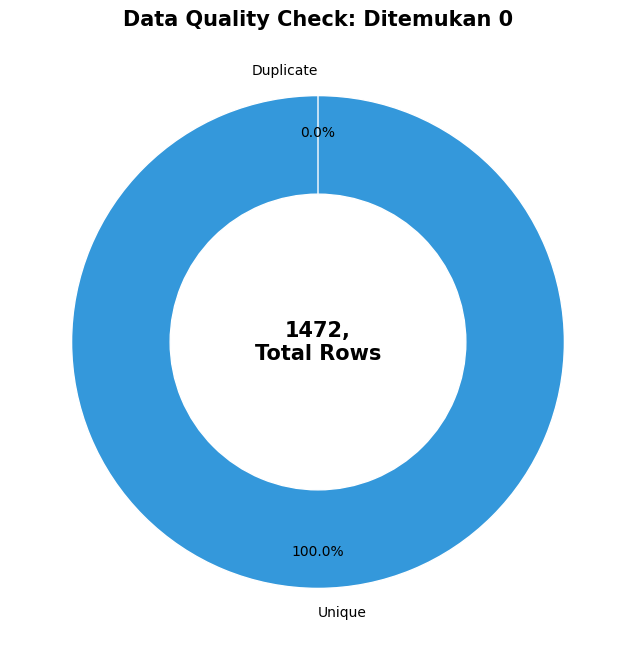

In [334]:
n_dup = df.duplicated().sum()
sizes = [len(df) - n_dup,  n_dup]

plt.figure(figsize=(10, 8))
color = ["#3498db", 'tomato']

plt.pie(sizes, labels=['Unique', 'Duplicate'], colors= color, autopct="%1.1f%%",
        startangle=90, pctdistance=0.85, wedgeprops={'width': 0.4, 'edgecolor': 'white'})

plt.text(0, 0, f"{len(df):},\nTotal Rows", ha = "center", va = 'center', fontsize = 15, fontweight = 'bold')
plt.title(f"Data Quality Check: Ditemukan {n_dup}", fontsize = 15, fontweight = 'bold')

plt.show()

### B.7 Cek Statistik Data

In [335]:
df.describe().describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
price,8.00,260.76,503.16,3.00,39.38,50.30,143.50,1472.00
rank,8.00,186.82,519.29,0.00,3.16,4.23,4.62,1472.00
Combination,8.00,184.52,520.22,0.00,0.36,0.83,1.00,1472.00
Dry,8.00,184.51,520.22,0.00,0.37,0.81,1.00,1472.00
Normal,8.00,184.52,520.22,0.00,0.36,0.83,1.00,1472.00
Oily,8.00,184.51,520.22,0.00,0.37,0.80,1.00,1472.00
Sensitive,8.00,184.50,520.23,0.00,0.37,0.76,1.00,1472.00


## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Ana;ysis (Melihat Distribusi 1 Fitur / Columns)

In [336]:
df['Label'].value_counts(normalize=True) * 100

Label
Moisturizer    20.244565
Cleanser       19.089674
Face Mask      18.070652
Treatment      16.847826
Eye cream      14.198370
Sun protect    11.548913
Name: proportion, dtype: float64

In [337]:
df['Tingkatan_Harga'] =  pd.qcut(df['price'], q=3, labels=['Standar', 'Mid', 'Luxury'])
df['Tingkatan_Harga'].value_counts()

Tingkatan_Harga
Standar    506
Mid        484
Luxury     482
Name: count, dtype: int64

In [338]:
rank_dist = df['rank'].value_counts(bins = 5).sort_index(ascending=False)
rank_dist

(4.0, 5.0]       1035
(3.0, 4.0]        395
(2.0, 3.0]         19
(1.0, 2.0]          2
(-0.006, 1.0]      21
Name: count, dtype: int64

In [339]:
# Membuat bin harga untuk melihat kepadatan pasar
bins = [0, 20, 40, 60, 80, 100, 500]
df['price_range'] = pd.cut(df['price'], bins=bins)
kepadatan = df['price_range'].value_counts().sort_index()

print(f"--- MARKET DENSITY (Kepadatan Pasar) ---")
print(kepadatan)

--- MARKET DENSITY (Kepadatan Pasar) ---
price_range
(0, 20]       178
(20, 40]      509
(40, 60]      351
(60, 80]      186
(80, 100]     122
(100, 500]    126
Name: count, dtype: int64


In [340]:
top_10_percent = df['price'].quantile(0.9)
print(f"Batas Harga Produk Elite (Top 10%): ${top_10_percent}")

Batas Harga Produk Elite (Top 10%): $98.0


In [341]:
brand_summary = df['brand'].value_counts().head(10)
brand_percent = df['brand'].value_counts(normalize=True).head(10) * 100

print("TOP 10 DOMINASI BRAND:")
summary_table = pd.DataFrame({
    'Jumlah Produk': brand_summary,
    'Market Share (%)': brand_percent.round(2)
})
display(summary_table)

# Insight: Jika 1 brand terlalu dominan, model bisa bias ke brand tersebut.

TOP 10 DOMINASI BRAND:


,Jumlah Produk,Market Share (%)
brand,,
CLINIQUE,79,5.37
SEPHORA COLLECTION,66,4.48
SHISEIDO,63,4.28
ORIGINS,54,3.67
MURAD,47,3.19
PETER THOMAS ROTH,46,3.12
KIEHL'S SINCE 1851,46,3.12
FRESH,44,2.99
DR. JART+,41,2.79


In [342]:
df['rank_in_category'] = df.groupby('Label')['rank'].rank(method='dense', ascending=False)


category_kings = df[df['rank_in_category'] == 1][['Label', 'brand', 'name', 'rank']]
display(category_kings)

,Label,brand,name,rank
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,5.0
177,Moisturizer,NURSE JAMIE,Tech Neck Prevention Kit,5.0
194,Moisturizer,CLINIQUE,Limited Edition Dramatically Different™ Moistu...,5.0
228,Moisturizer,DIOR,Capture Totale Multi-Perfection Creme Refill,5.0
244,Moisturizer,LANEIGE,Water Bank Dual Layer Face Oil,5.0
396,Cleanser,KIEHL'S SINCE 1851,Epidermal Re-Texturizing Micro-Dermabrasion,5.0
405,Cleanser,LA MER,The Cleansing Foam Mini,5.0
431,Cleanser,LANCÔME,Cleansing & Clarifying Duo,5.0
556,Cleanser,SHISEIDO,Extra Rich Cleansing Milk,5.0
570,Cleanser,ERNO LASZLO,Pore Refining Detox Double Cleanse,5.0


### C.2 Univariate Ana;ysis (Melihat Distribusi 2 Fitur / Columns)

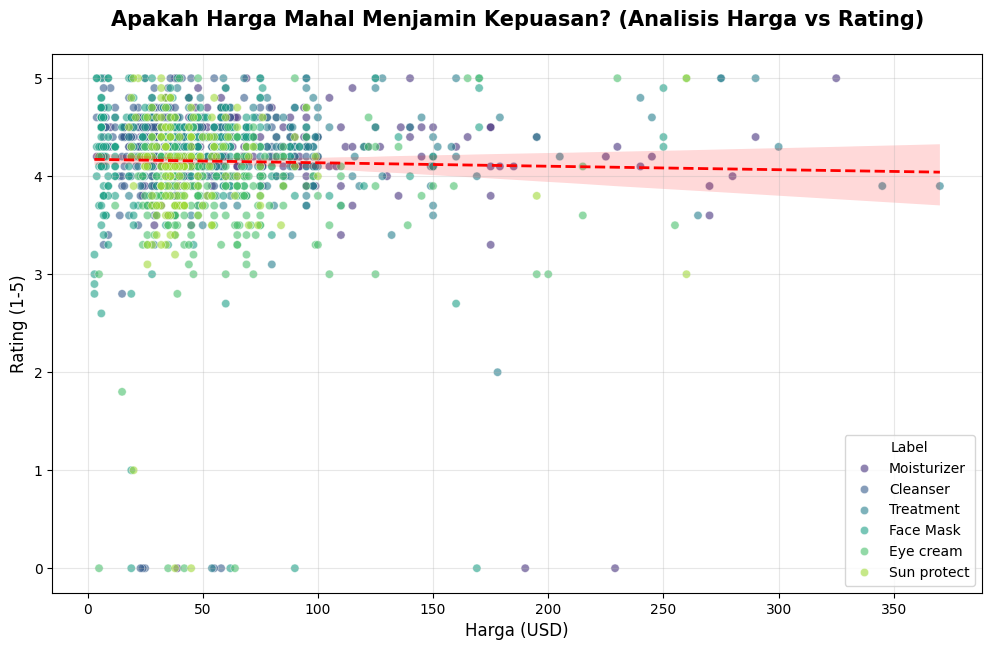

In [343]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='price', y='rank', hue='Label', alpha=0.6, palette='viridis')
sns.regplot(data=df, x='price', y='rank', scatter=False, color='red', line_kws={"ls":"--", "lw":2})

plt.title('Apakah Harga Mahal Menjamin Kepuasan? (Analisis Harga vs Rating)', fontsize=15, pad=20, fontweight = 'bold')
plt.xlabel('Harga (USD)', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('bivariate_price_rank.png')

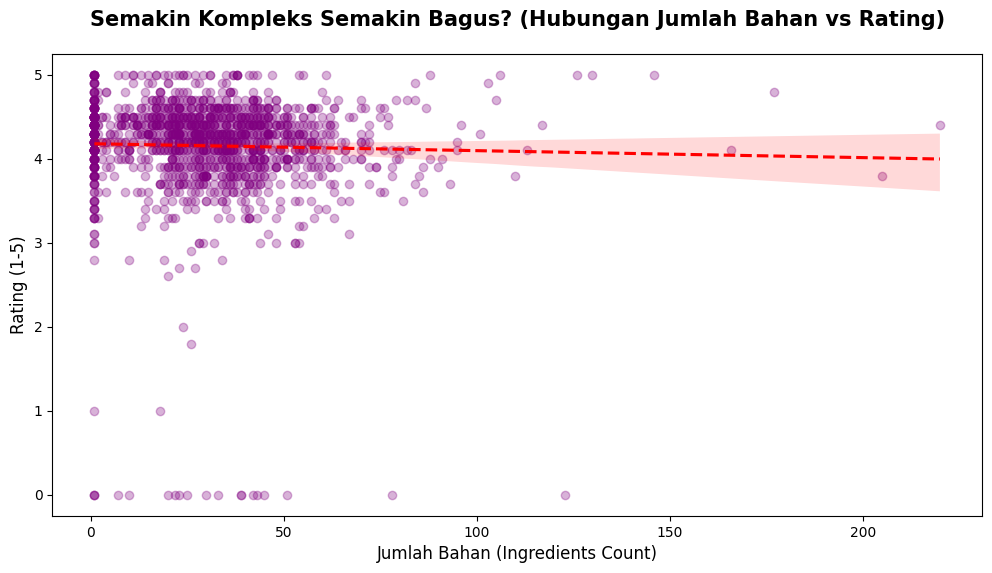

In [344]:
if 'ingredient_count' not in df.columns:
    df['ingredient_count'] = df['ingredients'].str.split(',').str.len()

plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='ingredient_count', y='rank', 
            scatter_kws={'alpha':0.3, 'color':'purple'}, 
            line_kws={'color':'red', 'ls':'--'})

plt.title('Semakin Kompleks Semakin Bagus? (Hubungan Jumlah Bahan vs Rating)', fontsize=15, pad=20, fontweight = 'bold')
plt.xlabel('Jumlah Bahan (Ingredients Count)', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.show()

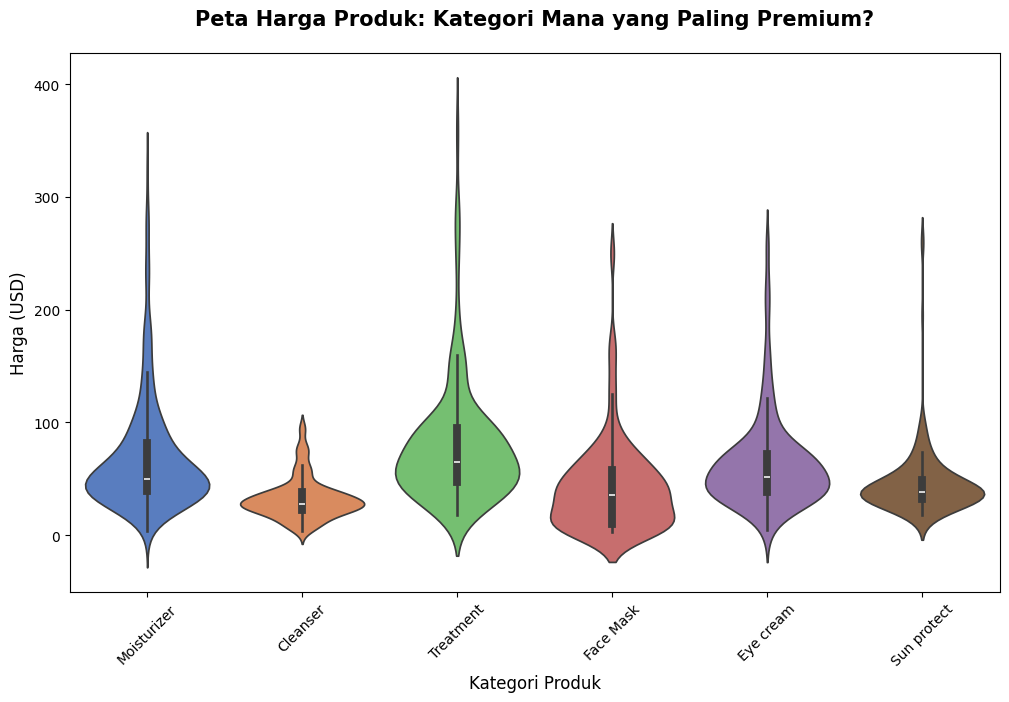

In [345]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Label', y='price', hue='Label', palette='muted', legend=False)

plt.title('Peta Harga Produk: Kategori Mana yang Paling Premium?', fontsize=15, pad=20, fontweight = 'bold')
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Harga (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

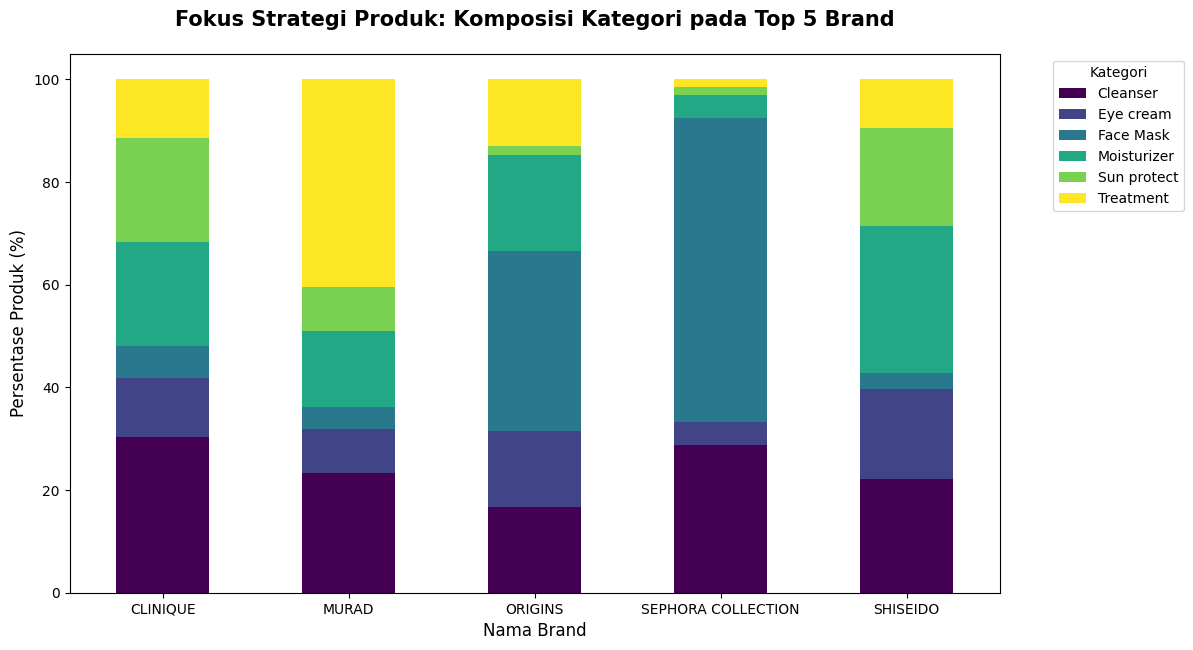

In [346]:
top_5_brands = df['brand'].value_counts().head(5).index
df_top = df[df['brand'].isin(top_5_brands)]

brand_category = pd.crosstab(df_top['brand'], df_top['Label'], normalize='index') * 100

brand_category.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Fokus Strategi Produk: Komposisi Kategori pada Top 5 Brand', fontsize=15, pad=20, fontweight = 'bold')
plt.xlabel('Nama Brand', fontsize=12)
plt.ylabel('Persentase Produk (%)', fontsize=12)
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [347]:
rerata_rating = df.groupby('Label')['rank'].mean().sort_values(ascending=False)
print(rerata_rating)

Label
Cleanser       4.312456
Moisturizer    4.238591
Treatment      4.218145
Face Mask      4.166917
Sun protect    4.051176
Eye cream      3.806220
Name: rank, dtype: float64


In [348]:
fokus_kulit = pd.crosstab(df['brand'], df['Sensitive']).head(10)
print(fokus_kulit)

Sensitive      0   1
brand               
ALGENIST      15  12
AMOREPACIFIC   6  15
ANTHONY        2   1
APIVITA        1   0
BAREMINERALS   5   1
BEAUTYBIO      2   3
BECCA          2   1
BELIF         11   7
BIOEFFECT      0   4
BIOSSANCE      1   8


In [349]:
bin_analysis = df.groupby('Tingkatan_Harga',observed=False)['rank'].agg(['mean', 'std'])
print(bin_analysis)

                     mean       std
Tingkatan_Harga                    
Standar          4.174704  0.656628
Mid              4.146281  0.613653
Luxury           4.137759  0.630369


### C.3 Multivariate Analysis (Interaksi Semua Columns)

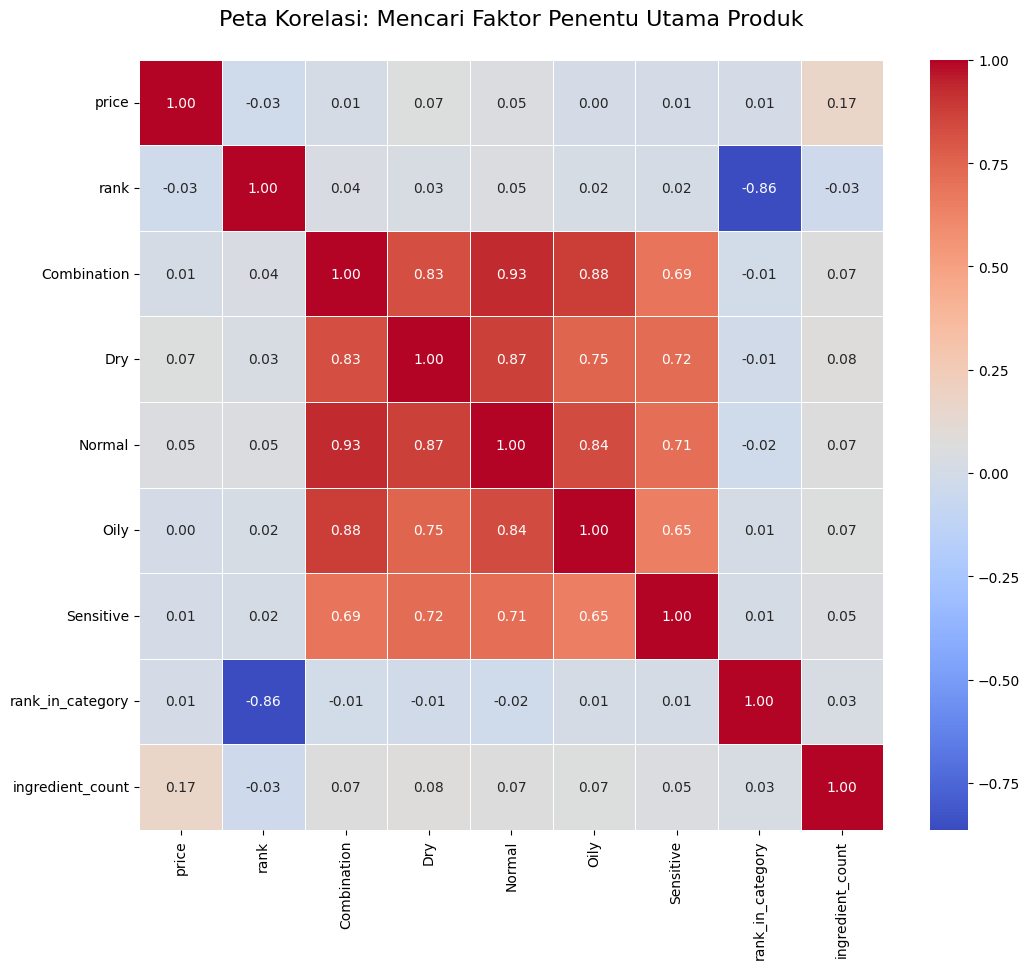

In [350]:
plt.figure(figsize=(12, 10))

numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Peta Korelasi: Mencari Faktor Penentu Utama Produk', fontsize=16, pad=25)
plt.show()

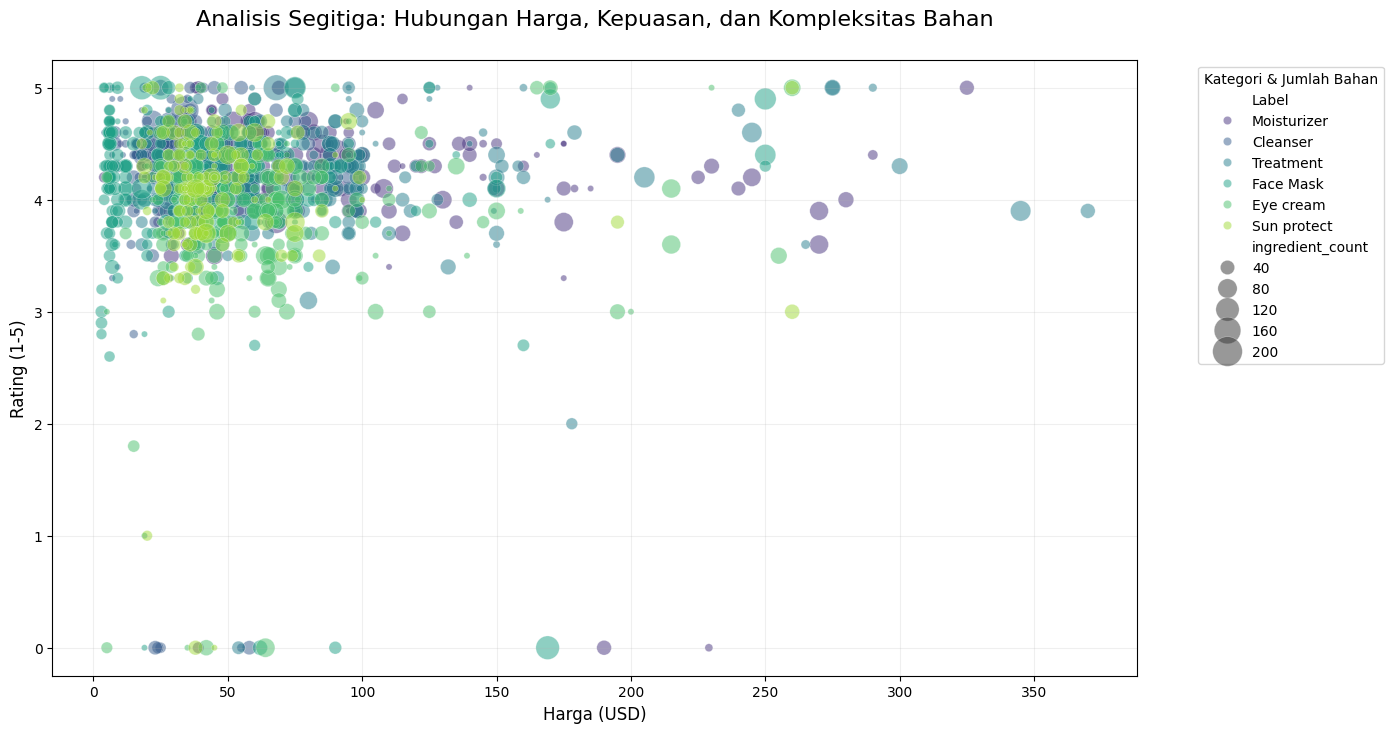

In [351]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=df, x='price', y='rank', size='ingredient_count', 
                hue='Label', alpha=0.5, sizes=(20, 500), palette='viridis')

plt.title('Analisis Segitiga: Hubungan Harga, Kepuasan, dan Kompleksitas Bahan', fontsize=16, pad=25)
plt.xlabel('Harga (USD)', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Kategori & Jumlah Bahan')
plt.grid(True, alpha=0.2)
plt.show()

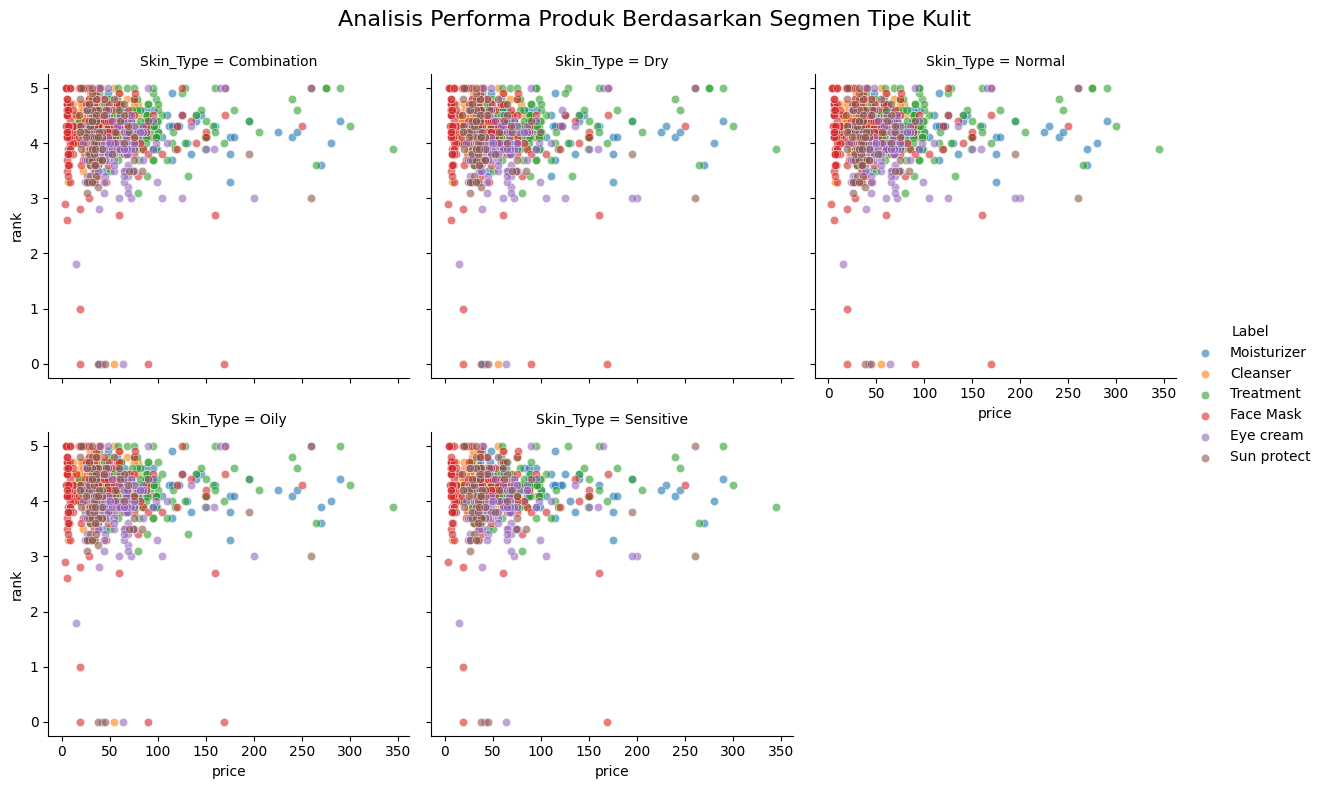

In [352]:
# Melt data agar tipe kulit menjadi satu kolom untuk facet
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
df_melted = df.melt(id_vars=['price', 'rank', 'Label'], value_vars=skin_types, 
                    var_name='Skin_Type', value_name='Is_Target')
df_melted = df_melted[df_melted['Is_Target'] == 1]

g = sns.FacetGrid(df_melted, col="Skin_Type", hue="Label", col_wrap=3, height=4)
g.map(sns.scatterplot, "price", "rank", alpha=0.6)
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Analisis Performa Produk Berdasarkan Segmen Tipe Kulit', fontsize=16)
plt.show()

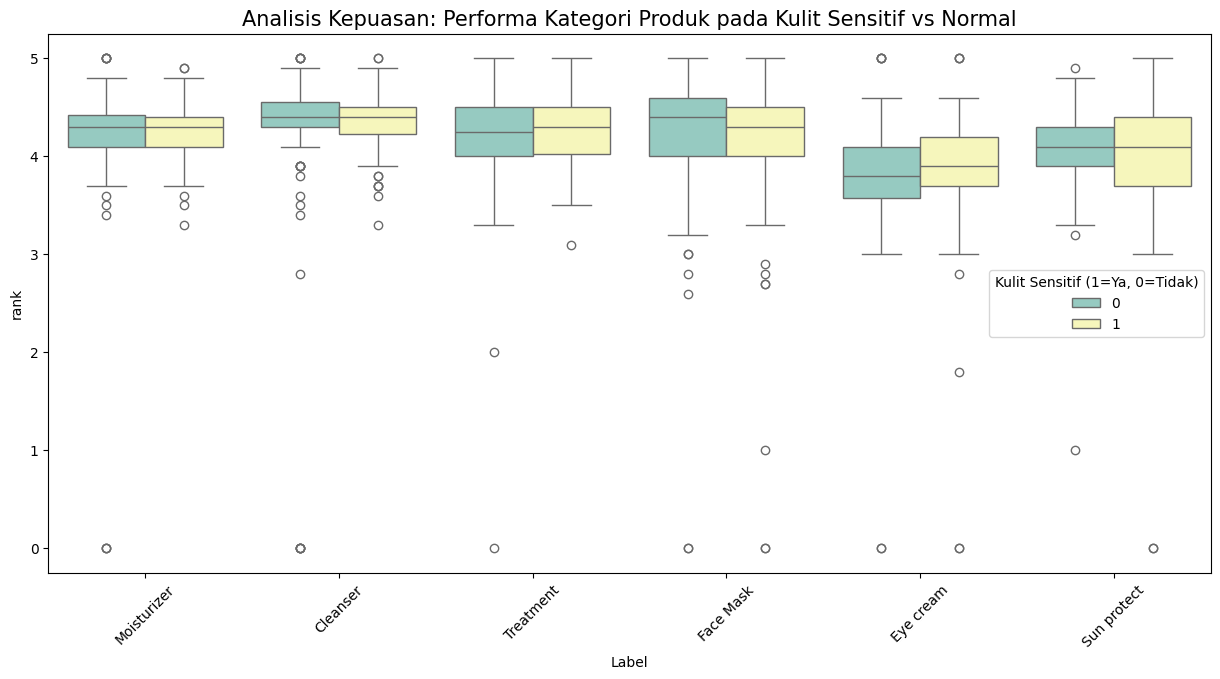

In [353]:
plt.figure(figsize=(15, 7))
# Menghubungkan Jenis Kulit, Kategori Produk, dan Rating
sns.boxplot(data=df, x='Label', y='rank', hue='Sensitive', palette='Set3')
plt.title('Analisis Kepuasan: Performa Kategori Produk pada Kulit Sensitif vs Normal', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Kulit Sensitif (1=Ya, 0=Tidak)')
plt.show()

## D. Data Preprocessing

### D.1 Mengubah target menjadi kategori yang jelas

In [354]:
df['target'] = (df['rank'] >= 4.5).astype(int)

In [355]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1467    0
1468    0
1469    0
1470    0
1471    0
Name: target, Length: 1472, dtype: int64

### D.2 Ekstrasi Columns Ingredients Agar Mempunyai Nilai Yang Jelas

In [356]:
df['ingredients'].value_counts()

ingredients
No Info                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              23
Visit the Dior boutique                                                                                                                                                                                                                                                                                                                                             

In [357]:
ingredients = ['Niacinamide', 'Retinol', 'Vitamin C', 'Salicylic Acid', 'Hyaluronic Acid', 'Ceramide']
for ing in ingredients:
    df[ing] = df['ingredients'].str.contains(ing, case=False, na=False).astype(int)

### D.3 Mapping Categorical Columns

In [358]:
cat = df.select_dtypes(include='object')

for col in cat:
 df[col] = df[col].astype('category').cat.codes

In [359]:
df

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,...,price_range,rank_in_category,ingredient_count,target,Niacinamide,Retinol,Vitamin C,Salicylic Acid,Hyaluronic Acid,Ceramide
0,3,64,335,175,4.1,115,1,1,1,1,...,"(100, 500]",10.0,42,0,0,0,0,0,0,0
1,3,95,525,179,4.1,251,1,1,1,1,...,"(100, 500]",10.0,7,0,0,0,0,0,0,0
2,3,29,985,68,4.4,767,1,1,1,1,...,"(60, 80]",7.0,59,0,0,0,0,0,0,0
3,3,64,1265,175,3.8,114,1,1,1,1,...,"(100, 500]",13.0,78,0,0,0,0,0,0,0
4,3,49,1459,38,4.1,1255,1,1,1,1,...,"(20, 40]",10.0,83,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,4,62,1452,35,3.9,531,1,1,1,1,...,"(20, 40]",12.0,26,0,0,0,0,0,0,0
1468,4,55,349,48,3.6,1092,0,0,0,0,...,"(40, 60]",15.0,40,0,0,0,0,0,0,0
1469,4,111,1125,54,3.5,770,0,0,0,0,...,"(40, 60]",16.0,19,0,0,0,0,0,0,0
1470,4,100,980,20,1.0,772,0,0,0,0,...,"(0, 20]",22.0,18,0,0,0,0,0,0,0


### D.4 Split Fitur dan Target

In [360]:
df

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,...,price_range,rank_in_category,ingredient_count,target,Niacinamide,Retinol,Vitamin C,Salicylic Acid,Hyaluronic Acid,Ceramide
0,3,64,335,175,4.1,115,1,1,1,1,...,"(100, 500]",10.0,42,0,0,0,0,0,0,0
1,3,95,525,179,4.1,251,1,1,1,1,...,"(100, 500]",10.0,7,0,0,0,0,0,0,0
2,3,29,985,68,4.4,767,1,1,1,1,...,"(60, 80]",7.0,59,0,0,0,0,0,0,0
3,3,64,1265,175,3.8,114,1,1,1,1,...,"(100, 500]",13.0,78,0,0,0,0,0,0,0
4,3,49,1459,38,4.1,1255,1,1,1,1,...,"(20, 40]",10.0,83,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,4,62,1452,35,3.9,531,1,1,1,1,...,"(20, 40]",12.0,26,0,0,0,0,0,0,0
1468,4,55,349,48,3.6,1092,0,0,0,0,...,"(40, 60]",15.0,40,0,0,0,0,0,0,0
1469,4,111,1125,54,3.5,770,0,0,0,0,...,"(40, 60]",16.0,19,0,0,0,0,0,0,0
1470,4,100,980,20,1.0,772,0,0,0,0,...,"(0, 20]",22.0,18,0,0,0,0,0,0,0


In [361]:
x = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 
        'Label', 'brand', 'ingredient_count', 'price',
        'Niacinamide', 'Retinol', 'Vitamin C', 
        'Salicylic Acid', 'Hyaluronic Acid', 'Ceramide']]
y = df['target']

### D.5 Stratified Split

In [362]:
def stratifed_split(x, y, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []

    for class_value in np.unique(y): 
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)

        x_train_list.append(x.iloc[idx[:split_ratio]])
        x_test_list.append(x.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])

    x_train = pd.concat(x_train_list)
    x_test = pd.concat(x_test_list)
    y_train = pd.concat(y_train_list)
    y_test = pd.concat(y_test_list)
    
    train_idx = np.random.permutation(len(x_train))
    test_idx = np.random.permutation(len(x_test))
    
    x_train = x_train.iloc[train_idx].reset_index(drop=True)
    y_train = y_train.iloc[train_idx].reset_index(drop=True)
    x_test = x_test.iloc[test_idx].reset_index(drop=True)
    y_test = y_test.iloc[test_idx].reset_index(drop=True)

    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = stratifed_split(x, y)

## E. Modeling

In [363]:
# import numpy as np

# class Node:
#     def __init__(self, weights=None, threshold=None, feature_indices=None, left=None, right=None, value=None):
#         self.weights = weights           # Bobot buat tiap fitur (w1, w2, ...)
#         self.threshold = threshold       # Batas hasil gabungan (theta)
#         self.feature_indices = feature_indices # Indeks fitur yang dipake
#         self.left = left
#         self.right = right
#         self.value = value

# class MyObliqueDecisionTree:
#     def __init__(self, max_depth=5, n_combinations=10):
#         self.max_depth = max_depth
#         self.n_combinations = n_combinations # Berapa kali kita coba bikin "garis miring" acak
#         self.root = None

#     def _gini(self, y):
#         m = len(y)
#         if m == 0: return 0
#         p = np.sum(y) / m
#         return 1.0 - (p**2 + (1-p)**2)

#     def _best_split(self, X, y):
#         best_gini = 999
#         best_weights, best_thr, best_features = None, None, None
        
#         n_features = X.shape[1]
        
#         # Kita coba beberapa kombinasi garis miring secara acak
#         for _ in range(self.n_combinations):
#             # 1. Pilih 2 atau 3 fitur secara acak buat digabungin (biar miring)
#             n_select = min(n_features, 2) 
#             feat_idx = np.random.choice(n_features, n_select, replace=False)
            
#             # 2. Bikin bobot acak antara -1 sampe 1
#             weights = np.random.uniform(-1, 1, n_select)
            
#             # 3. Proyeksikan data ke garis miring: Result = w1*X1 + w2*X2
#             projection = X.iloc[:, feat_idx].values @ weights
            
#             # 4. Cari threshold (batas) terbaik di garis miring itu
#             thresholds = np.unique(projection)
#             for thr in thresholds:
#                 left_idx = projection <= thr
#                 current_gini = (np.sum(left_idx)/len(y)) * self._gini(y[left_idx]) + \
#                                (np.sum(~left_idx)/len(y)) * self._gini(y[~left_idx])
                
#                 if current_gini < best_gini:
#                     best_gini = current_gini
#                     best_weights = weights
#                     best_thr = thr
#                     best_features = feat_idx
                    
#         return best_weights, best_thr, best_features

#     def _build_tree(self, X, y, depth=0):
#         if depth >= self.max_depth or len(np.unique(y)) == 1 or len(y) < 2:
#             return Node(value=np.round(np.mean(y)))

#         w, thr, feats = self._best_split(X, y)
#         if w is None: return Node(value=np.round(np.mean(y)))

#         projection = X.iloc[:, feats].values @ w
#         left_idx = projection <= thr
        
#         left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
#         right = self._build_tree(X[~left_idx], y[~left_idx], depth + 1)
#         return Node(weights=w, threshold=thr, feature_indices=feats, left=left, right=right)

#     def fit(self, X, y):
#         self.root = self._build_tree(X, y)

#     def _predict_one(self, x, node):
#         if node.value is not None: return node.value
        
#         # Hitung hasil miringnya: w1*x1 + w2*x2
#         val = np.dot(x[node.feature_indices], node.weights)
#         if val <= node.threshold:
#             return self._predict_one(x, node.left)
#         return self._predict_one(x, node.right)

#     def predict(self, X):
#         return np.array([self._predict_one(row.values, self.root) for _, row in X.iterrows()])

### E.1 Decision tree

In [364]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class MyDecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.root = None

    def _gini(self, y):
        m = len(y)
        if m == 0: return 0
        
        # Hitung jumlah masing-masing
        n_puas = np.sum(y == 1)
        n_biasa = np.sum(y == 0)
        
        # KASIH BOBOT: Kita anggap 1 produk PUAS itu seharga 3 produk BIASA
        weight_puas = 3.0 
        
        p_puas = (n_puas * weight_puas) / (n_puas * weight_puas + n_biasa)
        p_biasa = 1 - p_puas
        
        return 1.0 - (p_puas**2 + p_biasa**2)

    def _best_split(self, X, y):
        best_gini = 999
        best_idx, best_thr = None, None
        n_total = len(y)
        
        # Optimasi: Gunakan nilai unik agar tidak looping terlalu banyak
        for i in range(X.shape[1]):
            thresholds = np.unique(X.iloc[:, i])
            for thr in thresholds:
                left_idx = X.iloc[:, i] <= thr
                y_left, y_right = y[left_idx], y[~left_idx]
                
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                
                # Rumus: (n_kiri/n_total)*Gini_kiri + (n_kanan/n_total)*Gini_kanan
                current_gini = (len(y_left)/n_total) * self._gini(y_left) + \
                               (len(y_right)/n_total) * self._gini(y_right)
                
                if current_gini < best_gini:
                    best_gini = current_gini
                    best_idx, best_thr = i, thr
        return best_idx, best_thr

    def _build_tree(self, X, y, depth=0):
        # Berhenti jika mencapai max_depth, data murni, atau data terlalu sedikit
        if depth >= self.max_depth or len(np.unique(y)) == 1 or len(y) < 2:
            return Node(value=np.round(np.mean(y)) if len(y) > 0 else 0)

        idx, thr = self._best_split(X, y)
        if idx is None:
            return Node(value=np.round(np.mean(y)))

        left_idx = X.iloc[:, idx] <= thr
        left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._build_tree(X[~left_idx], y[~left_idx], depth + 1)
        
        return Node(feature=X.columns[idx], threshold=thr, left=left, right=right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_one(x, node.left)
        return self._predict_one(x, node.right)

    def predict(self, X):
        # Reset index agar iterrows tidak error jika data hasil split
        return np.array([self._predict_one(row, self.root) for _, row in X.iterrows()])

In [365]:
# class MyDecisionTree:
#     def __init__(self, max_depth=5):
#         self.max_depth = max_depth
#         self.root = None

#     def _gini(self, y):
#         m = len(y)
#         if m == 0: return 0
#         p = np.sum(y) / m
#         return 1.0 - (p**2 + (1-p)**2)

#     def _best_split(self, X, y):
#         best_gini = 999
#         best_idx, best_thr = None, None
#         n_total = len(y)
        
#         for i in range(X.shape[1]):
#             thresholds = np.unique(X.iloc[:, i])
#             for thr in thresholds:
#                 left_idx = X.iloc[:, i] <= thr
#                 y_left, y_right = y[left_idx], y[~left_idx]
                
#                 if len(y_left) == 0 or len(y_right) == 0: continue
                
#                 current_gini = (len(y_left)/n_total) * self._gini(y_left) + \
#                                (len(y_right)/n_total) * self._gini(y_right)
                
#                 if current_gini < best_gini:
#                     best_gini = current_gini
#                     best_idx, best_thr = i, thr
#         return best_idx, best_thr, best_gini

#     def _build_tree(self, X, y, depth=0, alpha=0):
#         parent_gini = self._gini(y)
        
#         if depth >= self.max_depth or len(np.unique(y)) == 1 or len(y) < 2:
#             return Node(value=np.round(np.mean(y)))

#         idx, thr, child_gini = self._best_split(X, y)
        
#         # PRUNING LOGIC: Jika peningkatan Gini (Gain) kurang dari Alpha, berhenti!
#         if (parent_gini - child_gini) < alpha:
#             return Node(value=np.round(np.mean(y)))

#         if idx is None: return Node(value=np.round(np.mean(y)))

#         left_idx = X.iloc[:, idx] <= thr
#         left = self._build_tree(X[left_idx], y[left_idx], depth + 1, alpha)
#         right = self._build_tree(X[~left_idx], y[~left_idx], depth + 1, alpha)
#         return Node(feature=X.columns[idx], threshold=thr, left=left, right=right)

#     def fit(self, X, y, alpha=0):
#         self.root = self._build_tree(X, y, alpha=alpha)

#     def _predict_one(self, x, node):
#         if node.value is not None: return node.value
#         if x[node.feature] <= node.threshold:
#             return self._predict_one(x, node.left)
#         return self._predict_one(x, node.right)

#     def predict(self, X):
#         return np.array([self._predict_one(row, self.root) for _, row in X.iterrows()])

In [366]:
# import numpy as np

# class Node:
#     """Ibarat satu kotak pertanyaan di pohon keputusan"""
#     def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
#         self.feature = feature      # Pertanyaan (Misal: Apakah ada Retinol?)
#         self.threshold = threshold  # Batas (Misal: Harga > 50)
#         self.left = left            # Jalur "YA"
#         self.right = right          # Jalur "TIDAK"
#         self.value = value          # Jawaban Akhir (Cuma ada di ujung pohon/daun)

# class MyDecisionTree:
#     def __init__(self, max_depth=5):
#         self.max_depth = max_depth
#         self.root = None

#     def _gini(self, y):
#         """Menghitung seberapa 'bingung' kelompok data ini"""
#         m = len(y)
#         if m == 0: return 0
#         p = np.sum(y) / m
#         return 1.0 - (p**2 + (1-p)**2)

#     def _best_split(self, X, y):
#         """Mencari pertanyaan paling pintar buat misahin data"""
#         best_gini = 999
#         best_idx, best_thr = None, None
        
#         for i in range(X.shape[1]): # Cek setiap fitur 
#             thresholds = np.unique(X.iloc[:, i])
#             for thr in thresholds:
#                 # Coba bagi data jadi dua
#                 left_idx = X.iloc[:, i] <= thr
#                 gini = self._gini(y[left_idx]) + self._gini(y[~left_idx])
                
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_idx, best_thr = i, thr
#         return best_idx, best_thr

#     def _build_tree(self, X, y, depth=0):
#         # Berhenti kalau sudah terlalu dalam atau data sudah bersih
#         if depth >= self.max_depth or len(np.unique(y)) == 1:
#             return Node(value=np.round(np.mean(y)))

#         idx, thr = self._best_split(X, y)
#         if idx is None: return Node(value=np.round(np.mean(y)))

#         left_idx = X.iloc[:, idx] <= thr
#         left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
#         right = self._build_tree(X[~left_idx], y[~left_idx], depth + 1)
#         return Node(feature=X.columns[idx], threshold=thr, left=left, right=right)

#     def fit(self, X, y):
#         self.root = self._build_tree(X, y)

#     def _predict_one(self, x, node):
#         if node.value is not None: return node.value
#         if x[node.feature] <= node.threshold:
#             return self._predict_one(x, node.left)
#         return self._predict_one(x, node.right)

#     def predict(self, X):
#         return np.array([self._predict_one(row, self.root) for _, row in X.iterrows()])


# model_scratch = MyDecisionTree(max_depth=3)
# model_scratch.fit(x_train, y_train)
# hasil_tebakan = model_scratch.predict(x_test)

### E.2 Grid Search Hypertunning

In [367]:
def grid_search_simple(X_train, y_train, X_test, y_test, depth_options):
    best_score = 0
    best_depth = 0
    
    print("--- MEMULAI PENCARIAN PARAMETER TERBAIK ---")
    for depth in depth_options:
        # Training dengan depth tertentu
        model = MyDecisionTree(max_depth=depth)
        model.fit(X_train, y_train)
        
        # Test akurasi
        preds = model.predict(X_test)
        acc = np.mean(preds == y_test)
        
        print(f"Mencoba Max Depth {depth} | Akurasi: {acc:.4f}")
        
        # Simpan yang terbaik
        if acc > best_score:
            best_score = acc
            best_depth = depth
            
    print(f"\nWINNER: Max Depth {best_depth} dengan Akurasi {best_score:.4f}")
    return best_depth


pilihan_depth = [2, 3, 4, 5, 10, 15]
depth_terbaik = grid_search_simple(x_train, y_train, x_test, y_test, pilihan_depth)


model_final = MyDecisionTree(max_depth=depth_terbaik)
model_final.fit(x_train, y_train)

--- MEMULAI PENCARIAN PARAMETER TERBAIK ---
Mencoba Max Depth 2 | Akurasi: 0.7288
Mencoba Max Depth 3 | Akurasi: 0.7288
Mencoba Max Depth 4 | Akurasi: 0.7288
Mencoba Max Depth 5 | Akurasi: 0.7322
Mencoba Max Depth 10 | Akurasi: 0.6881
Mencoba Max Depth 15 | Akurasi: 0.6407

WINNER: Max Depth 5 dengan Akurasi 0.7322


### E.3 Plot Tree

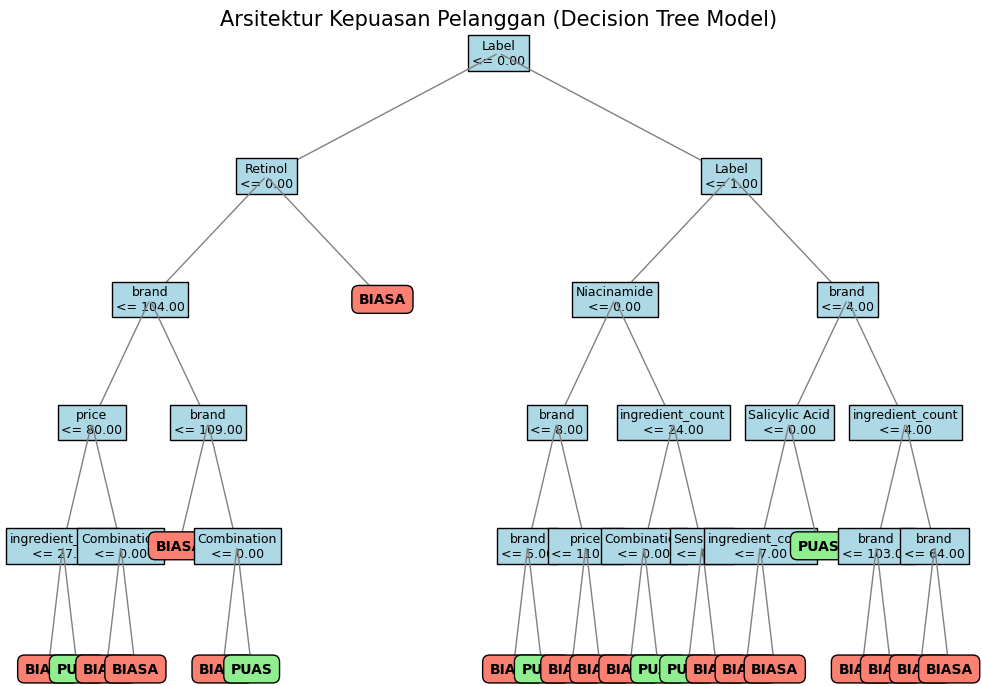

In [368]:
def plot_tree_manual(node, x, y, dx, dy, ax):
    if node.value is not None:
        # Gambar Kotak Daun (Leaf)
        warna = 'lightgreen' if node.value == 1 else 'salmon'
        label = "PUAS" if node.value == 1 else "BIASA"
        ax.text(x, y, label, bbox=dict(facecolor=warna, boxstyle='round,pad=0.5'),
                ha='center', va='center', fontsize=10, fontweight='bold')
        return

    # Gambar Kotak Pertanyaan
    ax.text(x, y, f"{node.feature}\n<= {node.threshold:.2f}", 
            bbox=dict(facecolor='lightblue', boxstyle='square,pad=0.3'),
            ha='center', va='center', fontsize=9)

    # Hitung posisi anak kiri dan kanan
    # Cabang Kiri (YA)
    ax.annotate("", xy=(x - dx, y - dy), xytext=(x, y),
                arrowprops=dict(arrowstyle="->", color='gray'))
    plot_tree_manual(node.left, x - dx, y - dy, dx/2, dy, ax)

    # Cabang Kanan (TIDAK)
    ax.annotate("", xy=(x + dx, y - dy), xytext=(x, y),
                arrowprops=dict(arrowstyle="->", color='gray'))
    plot_tree_manual(node.right, x + dx, y - dy, dx/2, dy, ax)

#  Kanvas
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Gambar Root
plot_tree_manual(model_final.root, x=0.5, y=1.0, dx=0.25, dy=0.2, ax=ax)

plt.title("Arsitektur Kepuasan Pelanggan (Decision Tree Model)", fontsize=15, pad=20)
plt.show()

In [369]:
# def plot_pdp_scratch(model, X, feature_name, grid_steps=20):
#     feature_min = X[feature_name].min()
#     feature_max = X[feature_name].max()
#     grid = np.linspace(feature_min, feature_max, grid_steps)
    
#     pdp_values = []
    
#     for val in grid:
#         X_temp = X.copy()
#         X_temp[feature_name] = val # Paksa semua data jadi nilai ini
#         preds = model.predict(X_temp)
#         pdp_values.append(np.mean(preds)) # Rata-rata kepuasan
        
#     plt.figure(figsize=(8, 5))
#     plt.plot(grid, pdp_values, marker='o', color='purple', linewidth=2)
#     plt.title(f"PDP: Bagaimana Perubahan '{feature_name}' Mempengaruhi Prediksi?", fontweight='bold')
#     plt.xlabel(f"Nilai {feature_name}")
#     plt.ylabel("Probabilitas Kepuasan Rata-rata")
#     plt.grid(alpha=0.3)
#     plt.show()

# # Panggil untuk fitur 'price'
# plot_pdp_scratch(model_final, x_test, 'price')

### E.4  Decision Boundary

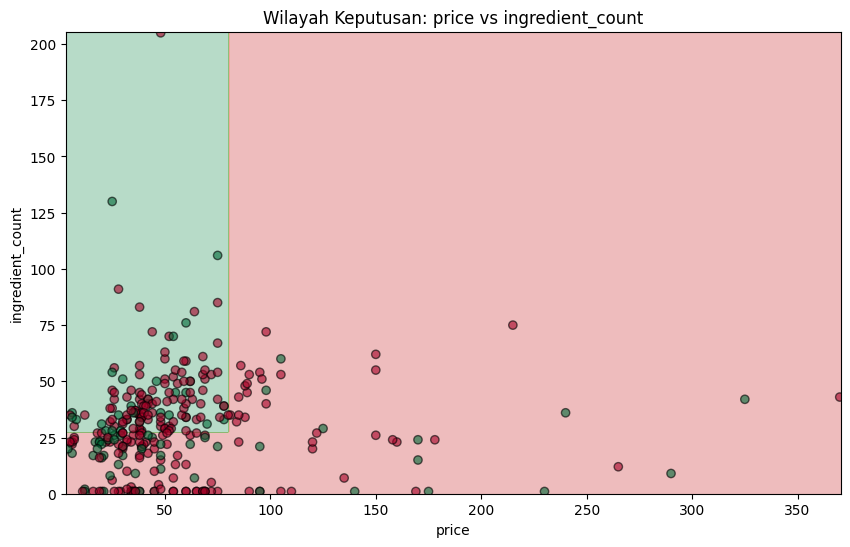

In [370]:
def plot_decision_boundaries(X, y, model, feat_x, feat_y):
    # Buat grid untuk background
    x_min, x_max = X[feat_x].min() - 1, X[feat_x].max() + 1
    y_min, y_max = X[feat_y].min() - 1, X[feat_y].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))

    # Kita buat dataframe dummy untuk prediksi grid
    grid_df = pd.DataFrame(np.zeros((xx.ravel().shape[0], X.shape[1])), columns=X.columns)
    grid_df[feat_x] = xx.ravel()
    grid_df[feat_y] = yy.ravel()
    
    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
    plt.scatter(X[feat_x], X[feat_y], c=y, edgecolors='k', cmap='RdYlGn', alpha=0.6)
    plt.title(f"Wilayah Keputusan: {feat_x} vs {feat_y}")
    plt.xlabel(feat_x)
    plt.ylabel(feat_y)
    plt.show()

# Panggil (Gunakan fitur kontinu seperti price dan rank)
plot_decision_boundaries(x_test, y_test, model_final, 'price', 'ingredient_count')

In [371]:
# def get_feature_importance(model, n_features):
#     # Kita buat kamus buat nyimpen skor pentingnya fitur
#     importance = {col: 0 for col in x_train.columns}
    
#     def traverse(node):
#         if node.value is not None: return
        
#         # Di setiap node, kita liat fitur apa yang dipake
#         # (Untuk model standard, bukan oblique)
#         importance[node.feature] += 1 # Versi simpel: hitung frekuensi muncul
        
#         traverse(node.left)
#         traverse(node.right)
        
#     traverse(model.root)
#     return importance

# # Visualisasikan pake Bar Chart
# import matplotlib.pyplot as plt

# feat_imp = get_feature_importance(model_scratch, len(x_train.columns))
# sorted_imp = dict(sorted(feat_imp.items(), key=lambda item: item[1], reverse=True))

# plt.figure(figsize=(10, 6))
# plt.barh(list(sorted_imp.keys())[:10], list(sorted_imp.values())[:10], color='teal')
# plt.title("Fitur Paling Berpengaruh dalam Penentuan Produk Skincare", fontweight='bold')
# plt.xlabel("Skor Kepentingan (Frekuensi Split)")
# plt.gca().invert_yaxis()
# plt.show()

In [372]:
# depths = range(1, 11)
# train_scores = []
# test_scores = []

# for d in depths:
#     temp_model = MyDecisionTree(max_depth=d) # Pake kelas from scratch lo
#     temp_model.fit(x_train, y_train)
    
#     # Hitung Akurasi Manual
#     train_acc = np.mean(temp_model.predict(x_train) == y_train)
#     test_acc = np.mean(temp_model.predict(x_test) == y_test)
    
#     train_scores.append(train_acc)
#     test_scores.append(test_acc)

# plt.plot(depths, train_scores, label='Data Latihan', marker='o')
# plt.plot(depths, test_scores, label='Data Ujian', marker='o')
# plt.xlabel('Kedalaman Pohon (Max Depth)')
# plt.ylabel('Akurasi')
# plt.title('Mencari Titik Optimal: Menghindari Overfitting', fontweight='bold')
# plt.legend()
# plt.grid(True)
# plt.show()

In [373]:
# def plot_roc_simple(y_true, y_pred):
#     # Hitung komponen
#     tp = np.sum((y_true == 1) & (y_pred == 1))
#     fp = np.sum((y_true == 0) & (y_pred == 1))
#     tn = np.sum((y_true == 0) & (y_pred == 0))
#     fn = np.sum((y_true == 1) & (y_pred == 0))
    
#     tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 # Sensitivity
#     fpr = fp / (fp + tn) if (fp + tn) > 0 else 0 # Fall-out
    
#     plt.figure(figsize=(6, 6))
#     plt.plot([0, fpr, 1], [0, tpr, 1], marker='o', color='darkorange', lw=2, label='ROC Curve')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Garis acak
    
#     plt.xlabel('False Positive Rate (Salah Tebak Puas)')
#     plt.ylabel('True Positive Rate (Bener Tebak Puas)')
#     plt.title('ROC Curve: Kemampuan Deteksi AI', fontweight='bold')
#     plt.legend(loc="lower right")
#     plt.grid(alpha=0.3)
#     plt.show()

# # Panggil fungsi
# plot_roc_simple(y_test, model_final.predict(x_test))

In [374]:
# def count_nodes(node):
#     """Menghitung jumlah kotak (node) di dalam pohon secara rekursif"""
#     if node is None or node.value is not None:
#         return 1
#     return 1 + count_nodes(node.left) + count_nodes(node.right)

In [375]:
# def plot_ccp_path_real(x_train, y_train, x_test, y_test):
#     # Kita coba berbagai nilai Alpha (mulai dari 0 sampai 0.1)
#     alphas = [0, 0.001, 0.005, 0.01, 0.02, 0.05] 
#     accuracies = []
#     nodes_counts = []

#     print("--- SEDANG MENGHITUNG ALPHA PATH (Mungkin butuh waktu beberapa detik) ---")
#     for a in alphas:
#         # 1. Buat model dan MASUKKAN alpha=a ke dalam fit
#         model = MyDecisionTree(max_depth=10)
#         model.fit(x_train, y_train, alpha=a)
        
#         # 2. Hitung akurasi asli dari model yang sudah dilatih
#         preds = model.predict(x_test)
#         acc = np.mean(preds == y_test)
#         accuracies.append(acc)
        
#         # 3. Hitung jumlah node asli dari model yang sudah dilatih
#         nodes_counts.append(count_nodes(model.root))
#         print(f"Alpha: {a:.3f} | Akurasi: {acc:.4f} | Nodes: {count_nodes(model.root)}")

#     # --- PLOTTING DATA REAL ---
#     fig, ax1 = plt.subplots(figsize=(10, 6))

#     # Garis Akurasi (Sumbu Y Kiri)
#     ax1.plot(alphas, accuracies, marker='o', color='royalblue', linewidth=2, label='Akurasi Test')
#     ax1.set_xlabel('Alpha (Penalti Kompleksitas)', fontsize=12)
#     ax1.set_ylabel('Akurasi (Persentase Benar)', color='royalblue', fontsize=12)
#     ax1.tick_params(axis='y', labelcolor='royalblue')

#     # Garis Jumlah Node (Sumbu Y Kanan)
#     ax2 = ax1.twinx()
#     ax2.plot(alphas, nodes_counts, marker='s', color='crimson', linewidth=2, label='Jumlah Node')
#     ax2.set_ylabel('Jumlah Node (Ukuran Pohon)', color='crimson', fontsize=12)
#     ax2.tick_params(axis='y', labelcolor='crimson')

#     plt.title("REAL CCP Path Analysis: Mencari Keseimbangan Model", fontsize=14, fontweight='bold', pad=20)
#     ax1.grid(True, linestyle='--', alpha=0.6)
#     fig.tight_layout()
#     plt.show()

# # Panggil fungsinya
# plot_ccp_path_real(x_train, y_train, x_test, y_test)

In [376]:
# class Node:
#     def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, prob=None):
#         self.feature = feature
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.value = value
#         self.prob = prob  

# class MyDecisionTree:
#     def __init__(self, max_depth=5):
#         self.max_depth = max_depth
#         self.root = None

#     def _gini(self, y):
#         m = len(y)
#         if m == 0: return 0
#         p = np.sum(y) / m
#         return 1.0 - (p**2 + (1-p)**2)

#     def _best_split(self, X, y):
#         best_gini = 999
#         best_idx, best_thr = None, None
#         n_total = len(y)
#         for i in range(X.shape[1]):
#             thresholds = np.unique(X.iloc[:, i])
#             for thr in thresholds:
#                 left_idx = X.iloc[:, i] <= thr
#                 y_left, y_right = y[left_idx], y[~left_idx]
#                 if len(y_left) == 0 or len(y_right) == 0: continue
#                 current_gini = (len(y_left)/n_total) * self._gini(y_left) + \
#                                (len(y_right)/n_total) * self._gini(y_right)
#                 if current_gini < best_gini:
#                     best_gini = current_gini
#                     best_idx, best_thr = i, thr
#         return best_idx, best_thr

#     def _build_tree(self, X, y, depth=0):
#         # HITUNG PROBABILITAS
#         node_prob = np.mean(y) if len(y) > 0 else 0
        
#         if depth >= self.max_depth or len(np.unique(y)) == 1 or len(y) < 2:
#             return Node(value=np.round(node_prob), prob=node_prob)

#         idx, thr = self._best_split(X, y)
#         if idx is None: return Node(value=np.round(node_prob), prob=node_prob)

#         left_idx = X.iloc[:, idx] <= thr
#         left = self._build_tree(X[left_idx], y[left_idx], depth + 1)
#         right = self._build_tree(X[~left_idx], y[~left_idx], depth + 1)
        
#         # Masukkan node_prob ke dalam Node
#         return Node(feature=X.columns[idx], threshold=thr, left=left, right=right, prob=node_prob)

#     def fit(self, X, y):
#         self.root = self._build_tree(X, y)

#     def _predict_one(self, x, node):
#         if node.value is not None: return node.value
#         if x[node.feature] <= node.threshold:
#             return self._predict_one(x, node.left)
#         return self._predict_one(x, node.right)

#     def predict(self, X):
#         return np.array([self._predict_one(row, self.root) for _, row in X.iterrows()])

In [377]:
# # Re-training model dengan arsitektur baru
# model_scratch = MyDecisionTree(max_depth=3)
# model_scratch.fit(x_train, y_train)

In [378]:
# def plot_waterfall_contribution(model, sample):
#     node = model.root
#     base_value = node.prob 
#     contributions = []
#     features = []
#     current_prob = base_value
    
#     while node.value is None:
#         prev_prob = current_prob
#         if sample[node.feature] <= node.threshold:
#             node = node.left
#         else:
#             node = node.right
#         current_prob = node.prob
#         contributions.append(current_prob - prev_prob)
#         features.append(node.feature)

#     plt.figure(figsize=(10, 6))
#     colors = ['#ff4b4b' if x < 0 else '#00cc66' for x in contributions]
#     y_pos = np.arange(len(features))
#     plt.barh(y_pos, contributions, color=colors, edgecolor='black', alpha=0.8)
#     plt.axvline(0, color='black', lw=1, ls='--')
#     plt.yticks(y_pos, features)
#     plt.title("Analisis Kontribusi Fitur (Waterfall Plot)", fontsize=13, fontweight='bold')
#     plt.xlabel("Dampak terhadap Probabilitas")
#     plt.gca().invert_yaxis()
#     plt.show()

# # Test lagi
# test_sample = x_test.iloc[0]
# plot_waterfall_contribution(model_scratch, test_sample)

## F. Evaluasi

### F.1 Simpan Hasil Tebakan

In [383]:
hasil_tebakan = model_final.predict(x_test)

### F.2 Hitung Akurasi

In [384]:
# Akurasi = (Tebakan yang Bener) / (Total Semua Soal)
bener = np.sum(y_test == hasil_tebakan)
total = len(y_test)
akurasi_manual = bener / total

In [387]:
print(f"--- RAPOR HASIL RAKITAN SENDIRI ---")
print(f"Total Soal Ujian: {total}")
print(f"Jawaban AI yang Bener: {bener}")
print(f"Skor Akurasi: {akurasi_manual * 100:.2f}%")

--- RAPOR HASIL RAKITAN SENDIRI ---
Total Soal Ujian: 295
Jawaban AI yang Bener: 216
Skor Akurasi: 73.22%


### F.3 Confusion Matrix

In [ ]:
tp = np.sum((y_test == 1) & (hasil_tebakan == 1)) 
tn = np.sum((y_test == 0) & (hasil_tebakan == 0)) 
fp = np.sum((y_test == 0) & (hasil_tebakan == 1)) 
fn = np.sum((y_test == 1) & (hasil_tebakan == 0))

print("\n--- TABEL KEBINGUNGAN (Confusion Matrix) ---")
print(f"Beneran Puas & AI Bilang Puas (TP): {tp}")
print(f"Beneran Biasa & AI Bilang Biasa (TN): {tn}")
print(f"Beneran Biasa tapi AI Bilang Puas (FP): {fp}")
print(f"Beneran Puas tapi AI Bilang Biasa (FN): {fn}")


--- TABEL KEBINGUNGAN (Confusion Matrix) ---
Beneran Puas & AI Bilang Puas (TP): 11
Beneran Biasa & AI Bilang Biasa (TN): 205
Beneran Biasa tapi AI Bilang Puas (FP): 10
Beneran Puas tapi AI Bilang Biasa (FN): 69


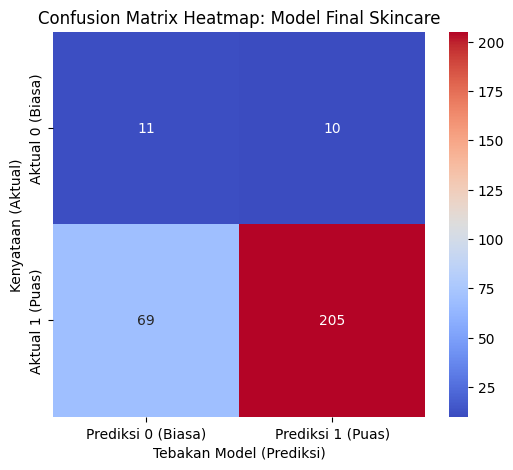

In [391]:
cm_matrix = np.array([
    [tp, fp], 
    [fn, tn]
])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Prediksi 0 (Biasa)', 'Prediksi 1 (Puas)'],
            yticklabels=['Aktual 0 (Biasa)', 'Aktual 1 (Puas)'])

plt.ylabel('Kenyataan (Aktual)')
plt.xlabel('Tebakan Model (Prediksi)')
plt.title('Confusion Matrix Heatmap: Model Final Skincare')
plt.show()

### F.4 Accuracy, Precision, Recall and F1 Score

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"--- EVALUASI MODEL FINAL ---")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f} (Seberapa akurat tebakan PUAS)")
print(f"Recall    : {recall:.4f} (Seberapa banyak produk PUAS yang tertangkap)")
print(f"F1-Score  : {f1:.4f} (Keseimbangan Precision & Recall)")

--- EVALUASI MODEL FINAL ---
Accuracy  : 0.7322
Precision : 0.5238 (Seberapa akurat tebakan PUAS)
Recall    : 0.1375 (Seberapa banyak produk PUAS yang tertangkap)
F1-Score  : 0.2178 (Keseimbangan Precision & Recall)


### F.5 Roc Curve

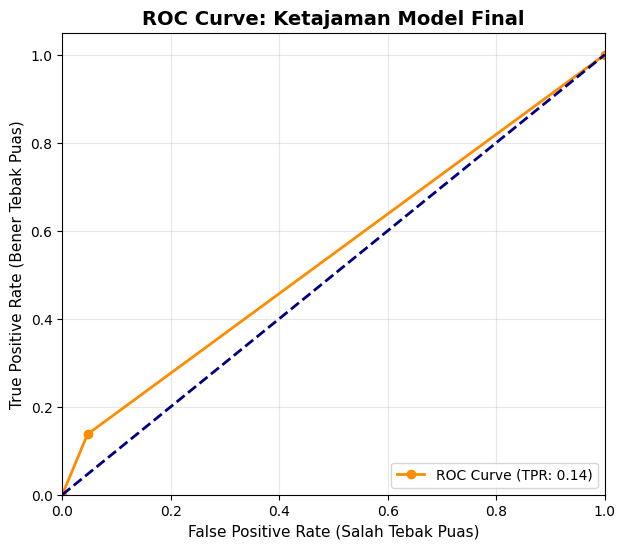

In [398]:
def plot_roc_curve(y_true, y_pred):

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Hitung Rate
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0 
    
    plt.figure(figsize=(7, 6))
    # garis ROC 
    plt.plot([0, fpr, 1], [0, tpr, 1], color='darkorange', lw=2, marker='o', label=f'ROC Curve (TPR: {tpr:.2f})')
    # garis diagonal 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (Salah Tebak Puas)', fontsize=11)
    plt.ylabel('True Positive Rate (Bener Tebak Puas)', fontsize=11)
    plt.title('ROC Curve: Ketajaman Model Final', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Panggil pake data TEST
plot_roc_curve(y_test.values, model_final.predict(x_test))

### F.6 Barplot Perbandingan Akurasi Train Vs Akurasi Test

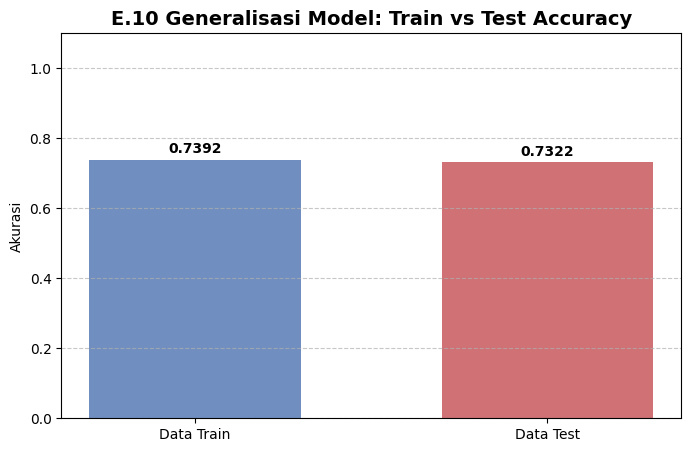

In [ ]:
def plot_train_test_comparison(model_final, x_train, y_train, x_test, y_test):
    # Hitung akurasi kedua data
    train_acc = np.mean(model_final.predict(x_train) == y_train.values)
    test_acc = np.mean(model_final.predict(x_test) == y_test.values)
    
    labels = ['Data Train', 'Data Test']
    scores = [train_acc, test_acc]
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, scores, color=['#4C72B0', '#C44E52'], alpha=0.8, width=0.6)
    
    # label angka di atas bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontweight='bold')
    
    plt.ylim(0, 1.1)
    plt.ylabel('Akurasi')
    plt.title('E.10 Generalisasi Model: Train vs Test Accuracy', fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_train_test_comparison(model_final, x_train, y_train, x_test, y_test)

### F.7 Learning Curve

Sedang menghitung kurva pembelajaran...


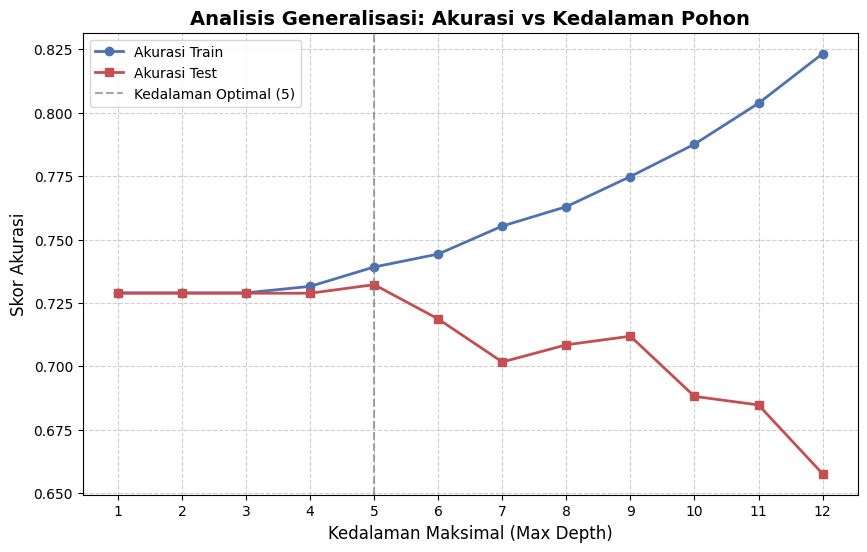

In [ ]:
def plot_learning_curve_line(x_train, y_train, x_test, y_test, max_d=15):
    depths = range(1, max_d + 1)
    train_accuracies = []
    test_accuracies = []

    print("Sedang menghitung kurva pembelajaran...")
    for d in depths:
        # Inisialisasi model 
        model = MyDecisionTree(max_depth=d)
        model.fit(x_train, y_train)
        
        # Hitung akurasi Train
        train_preds = model.predict(x_train)
        train_acc = np.mean(train_preds == y_train.values)
        train_accuracies.append(train_acc)
        
        # Hitung akurasi Test
        test_preds = model.predict(x_test)
        test_acc = np.mean(test_preds == y_test.values)
        test_accuracies.append(test_acc)

    # Visualisasi Line Plot
    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_accuracies, marker='o', label='Akurasi Train', color='#4C72B0', linewidth=2)
    plt.plot(depths, test_accuracies, marker='s', label='Akurasi Test', color='#C44E52', linewidth=2)
    
    # Menandai titik optimal 
    best_depth = depths[np.argmax(test_accuracies)]
    plt.axvline(x=best_depth, color='gray', linestyle='--', alpha=0.7, label=f'Kedalaman Optimal ({best_depth})')

    plt.title('Analisis Generalisasi: Akurasi vs Kedalaman Pohon', fontsize=14, fontweight='bold')
    plt.xlabel('Kedalaman Maksimal (Max Depth)', fontsize=12)
    plt.ylabel('Skor Akurasi', fontsize=12)
    plt.xticks(depths)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_learning_curve_line(x_train, y_train, x_test, y_test, max_d=12)

## G. Recommendation System

In [401]:
def skincare_recommendation_system(user_profile, dataset, model):
    """
    Sistem rekomendasi berdasarkan prediksi tingkat kepuasan AI.
    """
    print(f"--- MEMULAI ANALISIS KULIT UNTUK TIPE: {user_profile['skin_type']} ---")
    
    # Filter dataset berdasarkan tipe kulit user 
    # Agar AI hanya fokus pada produk yang memang untuk tipe kulit tersebut
    recommended_pool = dataset[dataset[user_profile['skin_type']] == 1].copy()
    
    if recommended_pool.empty:
        return "Maaf, tidak ada produk yang cocok untuk tipe kulit Anda saat ini."

    # Siapkan fitur untuk diprediksi AI
    X_predict = recommended_pool[x_train.columns]
    
    # AI menebak tingkat kepuasan
    recommended_pool['satisfaction_prediction'] = model.predict(X_predict)
    
    #  Ambil produk yang diprediksi PUAS 
    final_recommendations = recommended_pool[recommended_pool['satisfaction_prediction'] == 1]
    
    # 5. Sorting berdasarkan harga termurah atau rating tertinggi 
    # Di sini sort berdasarkan 'price' agar ramah di kantong
    final_recommendations = final_recommendations.sort_values(by='price', ascending=True)

    return final_recommendations[['brand', 'Label', 'price', 'ingredient_count']].head(5)

my_skin = {
    'skin_type': 'Oily' # Ganti dengan: 'Dry', 'Normal', 'Sensitive', 'Combination'
}

rekomendasi_saya = skincare_recommendation_system(my_skin, df, model_final)

print("\nTOP 5 PRODUK REKOMENDASI UNTUK ANDA:")
display(rekomendasi_saya)

--- MEMULAI ANALISIS KULIT UNTUK TIPE: Oily ---

TOP 5 PRODUK REKOMENDASI UNTUK ANDA:


,brand,Label,price,ingredient_count
360,88,0,8,33
494,82,0,8,40
504,41,0,9,31
400,82,0,15,40
382,79,0,19,117
